# Load modules and Set constants

In [1]:
import os, cv2, glob
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib.pyplot as plt

In [2]:
WIDTH, HEIGHT = 256, 256

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '39',
    'date' : '09-08-2021',
    'description' : 'Compute MSE of simple and selected trajectory'
    }

ROOT_DIR = os.path.join('C:\\', 'GitHub', 'Lab_Experiment', 'Trajectory_Clustering')

GEOLIFE_DIR = os.path.join('C:\\', 'Dataset', 'Geolife')
LOW_DIMENSION_DIR = os.path.join(GEOLIFE_DIR, 'Low_Dimension')
IMAGE_DIR = os.path.join(GEOLIFE_DIR, 'Image_Files')

RESULT_DIR = os.path.join( 'C:\\', 'GitHub', 'Lab_Experiment', 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Results"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:          {ROOT_DIR}')
print(f'GEOLIFE_DIR:       {GEOLIFE_DIR}')
print(f'LOW_DIMENSION_DIR: {LOW_DIMENSION_DIR}')
print(f'IMAGE_DIR:         {IMAGE_DIR}')
print(f'RESULT_DIR:        {RESULT_DIR}')
print(f'CURR_RESULT_DIR:   {CURR_RESULT_DIR}')

ROOT_DIR:          C:\GitHub\Lab_Experiment\Trajectory_Clustering
GEOLIFE_DIR:       C:\Dataset\Geolife
LOW_DIMENSION_DIR: C:\Dataset\Geolife\Low_Dimension
IMAGE_DIR:         C:\Dataset\Geolife\Image_Files
RESULT_DIR:        C:\GitHub\Lab_Experiment\Results
CURR_RESULT_DIR:   C:\GitHub\Lab_Experiment\Results\Trajectory_Clusetring_39_09-08-2021_Results


# Load Data

In [3]:
os.chdir(IMAGE_DIR)
file_names = sorted(glob.glob('*png'))

In [4]:
trajectory_images = [ ]
for file in file_names:
    trajectory_images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))

# Get similar data

In [5]:
def load_low_dimension_data(dir_name: str) -> list:
    low_dimension = []

    os.chdir(os.path.join(LOW_DIMENSION_DIR, dir_name))
    for data in sorted(glob.glob('*data')):
        with open(data, 'rb') as f:
             low_dimension.append(pkl.load(f))
                
    return np.array(low_dimension)

In [6]:
map_table = pd.read_csv(GEOLIFE_DIR + '\Map_Table.csv', header = 0)
def match_image_to_lowDim(img_name: str) -> int:
    front = int(img_name.split('.')[0][len('Geolife_trajectory'):])
    
    return str(map_table[map_table['ImageNumber'] == front].iloc[0][' LowDimNumber'])

In [9]:
from scipy.spatial import distance

def get_MSE(list1: np.array, list2: np.array) -> float:
    similarities = [ ]
    for low_dim1, low_dim2 in zip(list1, list2):
        similarities.append(distance.cosine(low_dim1, low_dim2))

    return sum(np.square(similarities)) / len(similarities)

def search_similar_trajectories(target_img: str, top = 10) -> pd.DataFrame:
    print("Get Similar image with", target_img, ".....")
    base_low_dimension = load_low_dimension_data(match_image_to_lowDim(target_img) + 'th data')

    similar_images = []    
    for idx, curr_file_name in enumerate(file_names):
        if (idx % 3_000 == 0):
            print(f'{idx}/{len(file_names)}')
        lowDim_name = match_image_to_lowDim(curr_file_name)
        curr_low_dimension = load_low_dimension_data(lowDim_name + 'th data')

        similar_images.append([get_MSE(base_low_dimension, curr_low_dimension), curr_file_name])

    df = pd.DataFrame(similar_images, columns = ['MSE', 'Image File Name'])
    df = df.sort_values(by = 'MSE', axis = 0)
    
    os.chdir(CURR_RESULT_DIR)
    df.to_csv(f'Similar_trajectories_with({target_img}).csv')
    
    print("Done", target_img, ".....")
    
    return df.head(top)

In [10]:
targets = ['Geolife_trajectory5.png', 'Geolife_trajectory218.png', 'Geolife_trajectory357.png', 'Geolife_trajectory507.png', 'Geolife_trajectory1434.png', 'Geolife_trajectory1875.png', 'Geolife_trajectory3676.png']
similar_data_frames = []
for target in targets:
    similar_data_frames.append(search_similar_trajectories(target))

Get Similar image with Geolife_trajectory5.png .....
0/18670
3000/18670
6000/18670
9000/18670
12000/18670
15000/18670
18000/18670
Done Geolife_trajectory5.png .....
Get Similar image with Geolife_trajectory218.png .....
0/18670
3000/18670
6000/18670
9000/18670
12000/18670
15000/18670
18000/18670
Done Geolife_trajectory218.png .....
Get Similar image with Geolife_trajectory357.png .....
0/18670
3000/18670
6000/18670
9000/18670
12000/18670
15000/18670
18000/18670
Done Geolife_trajectory357.png .....
Get Similar image with Geolife_trajectory507.png .....
0/18670
3000/18670
6000/18670
9000/18670
12000/18670
15000/18670
18000/18670
Done Geolife_trajectory507.png .....
Get Similar image with Geolife_trajectory1434.png .....
0/18670
3000/18670
6000/18670
9000/18670
12000/18670
15000/18670
18000/18670
Done Geolife_trajectory1434.png .....
Get Similar image with Geolife_trajectory1875.png .....
0/18670
3000/18670
6000/18670
9000/18670
12000/18670
15000/18670
18000/18670
Done Geolife_trajectory1

['Geolife_trajectory5.png', 'Geolife_trajectory5236.png', 'Geolife_trajectory6391.png', 'Geolife_trajectory3888.png', 'Geolife_trajectory1530.png', 'Geolife_trajectory7660.png', 'Geolife_trajectory12048.png', 'Geolife_trajectory1038.png', 'Geolife_trajectory685.png', 'Geolife_trajectory117.png']


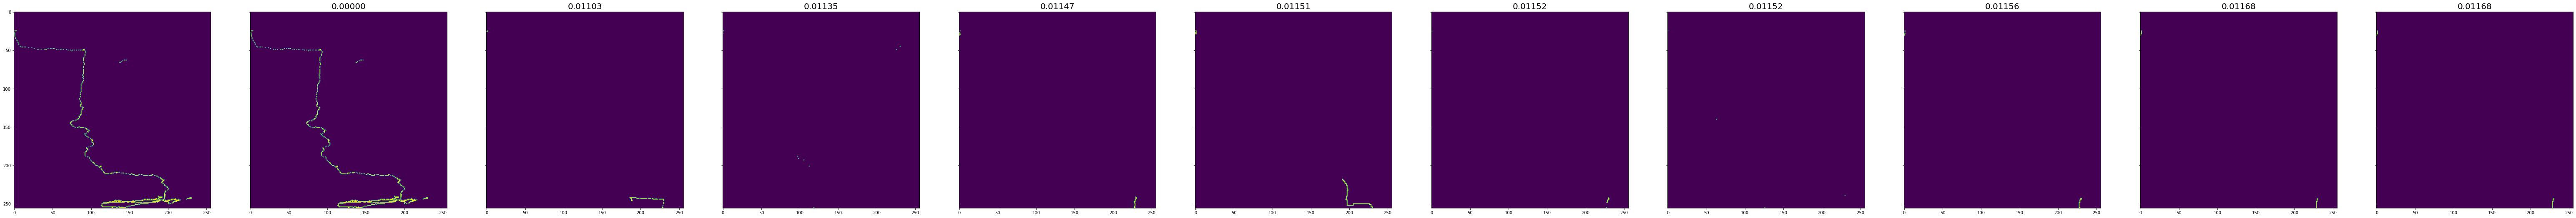

['Geolife_trajectory218.png', 'Geolife_trajectory220.png', 'Geolife_trajectory189.png', 'Geolife_trajectory242.png', 'Geolife_trajectory188.png', 'Geolife_trajectory231.png', 'Geolife_trajectory195.png', 'Geolife_trajectory225.png', 'Geolife_trajectory204.png', 'Geolife_trajectory223.png']


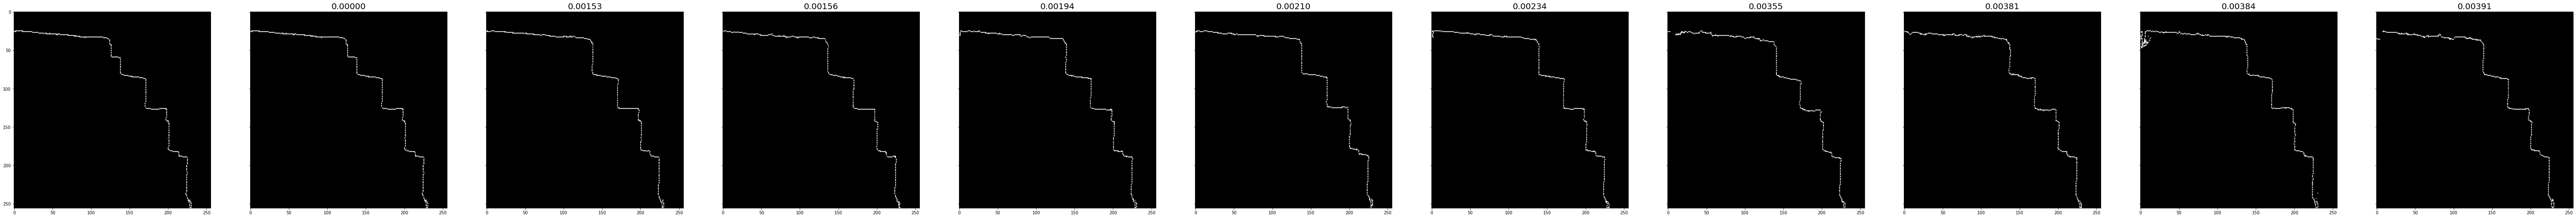

['Geolife_trajectory357.png', 'Geolife_trajectory282.png', 'Geolife_trajectory392.png', 'Geolife_trajectory361.png', 'Geolife_trajectory395.png', 'Geolife_trajectory344.png', 'Geolife_trajectory388.png', 'Geolife_trajectory266.png', 'Geolife_trajectory394.png', 'Geolife_trajectory279.png']


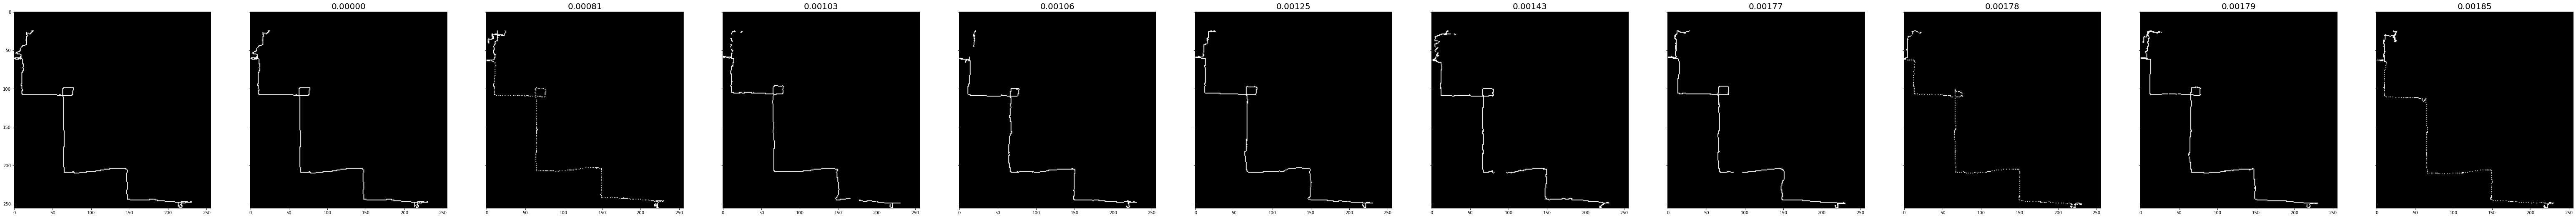

['Geolife_trajectory507.png', 'Geolife_trajectory438.png', 'Geolife_trajectory2251.png', 'Geolife_trajectory9734.png', 'Geolife_trajectory5077.png', 'Geolife_trajectory835.png', 'Geolife_trajectory13387.png', 'Geolife_trajectory7134.png', 'Geolife_trajectory358.png', 'Geolife_trajectory456.png']


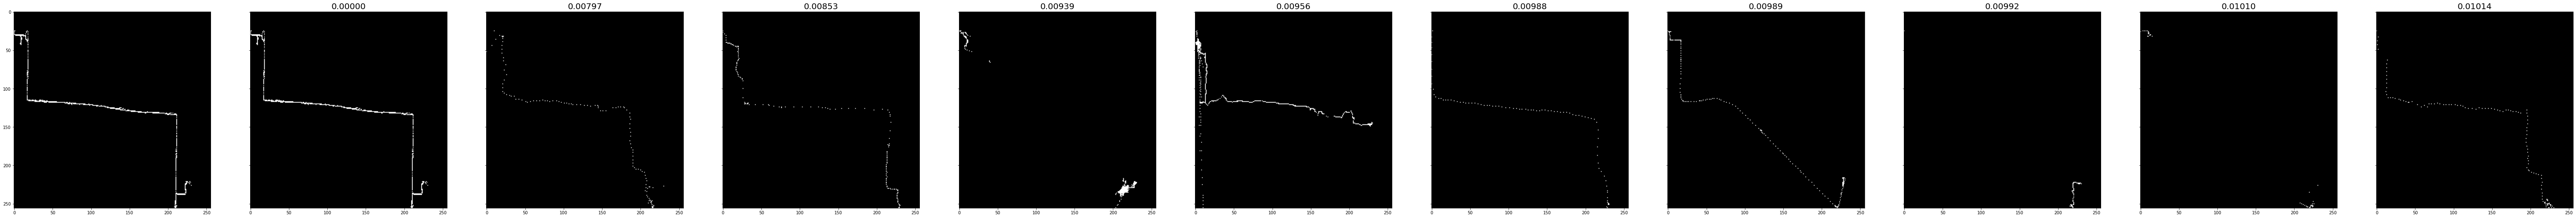

['Geolife_trajectory1434.png', 'Geolife_trajectory1428.png', 'Geolife_trajectory6487.png', 'Geolife_trajectory4376.png', 'Geolife_trajectory6194.png', 'Geolife_trajectory10208.png', 'Geolife_trajectory4975.png', 'Geolife_trajectory13912.png', 'Geolife_trajectory2296.png', 'Geolife_trajectory4550.png']


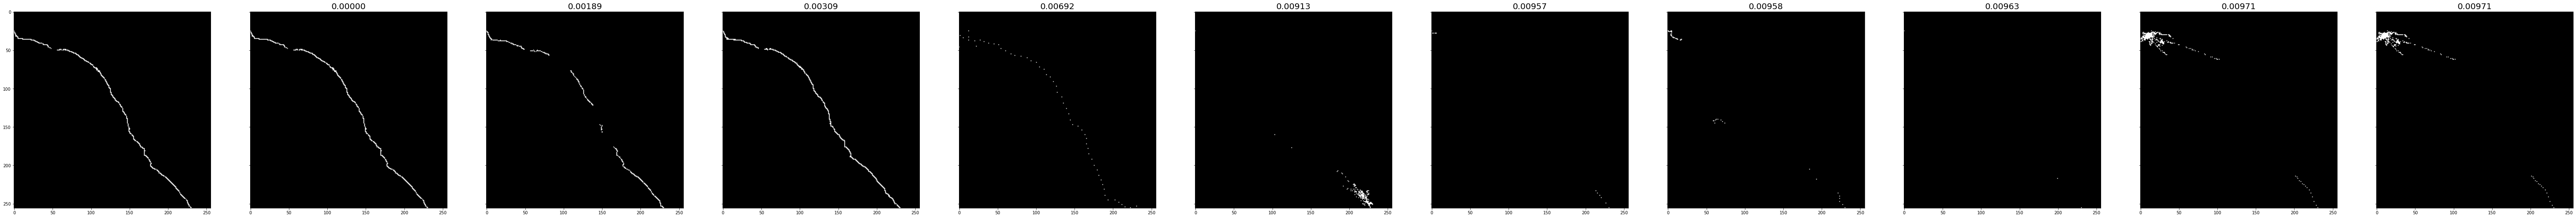

['Geolife_trajectory1875.png', 'Geolife_trajectory1913.png', 'Geolife_trajectory1883.png', 'Geolife_trajectory1845.png', 'Geolife_trajectory1957.png', 'Geolife_trajectory1853.png', 'Geolife_trajectory6990.png', 'Geolife_trajectory5114.png', 'Geolife_trajectory8802.png', 'Geolife_trajectory5599.png']


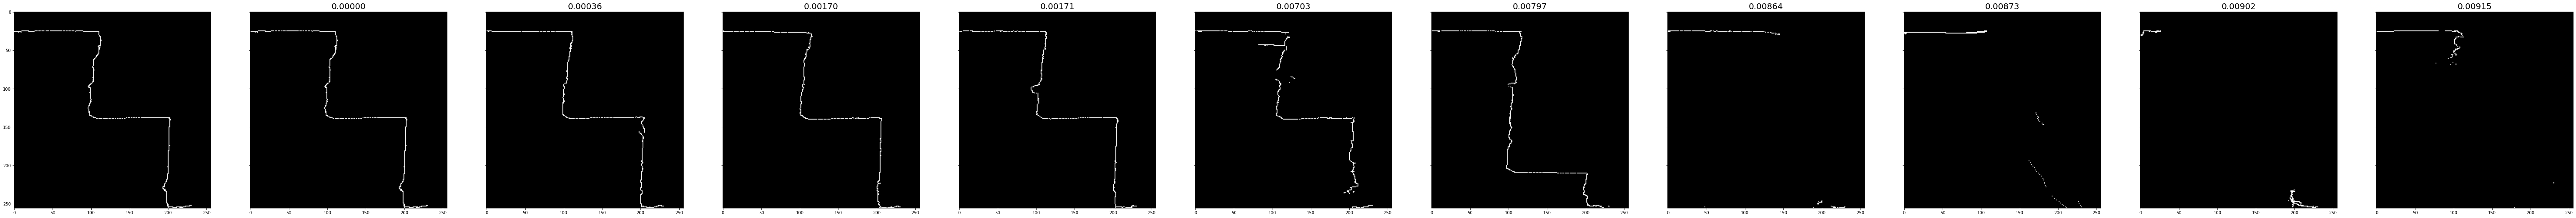

['Geolife_trajectory3676.png', 'Geolife_trajectory3881.png', 'Geolife_trajectory3686.png', 'Geolife_trajectory3818.png', 'Geolife_trajectory3720.png', 'Geolife_trajectory3669.png', 'Geolife_trajectory3838.png', 'Geolife_trajectory3856.png', 'Geolife_trajectory3790.png', 'Geolife_trajectory3866.png']


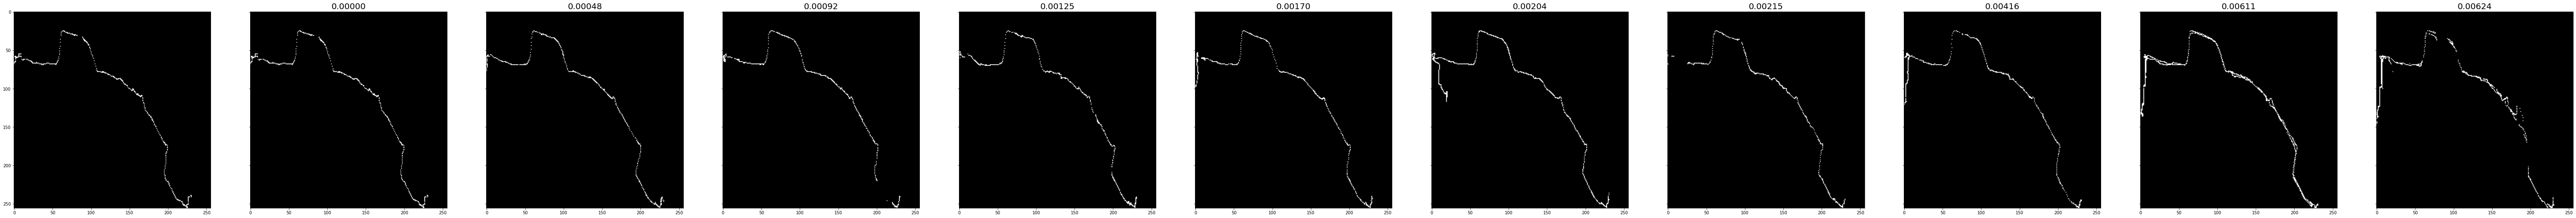

In [11]:
find_image = lambda name: trajectory_images[file_names.index(name)]

for i, target in enumerate(targets):
    fig, ax = plt.subplots(1, 11, sharex = True, sharey = True, figsize = (110, 10))
    ax[0].imshow(find_image(target))
    
    df = similar_data_frames[i]
    names = []
    for j in range(1, 11):
        names.append(df.iloc[j - 1, 1])
        ax[j].set_title(f'{df.iloc[j - 1, 0]:.5f}', fontsize = 20)
        ax[j].imshow(find_image(names[-1]))
    
    print(names)
    
    os.chdir(CURR_RESULT_DIR)
    plt.gray()
    plt.savefig(f'Similar_trajectories_with({target}).png', dpi = 300)
    plt.show()